<a href="https://colab.research.google.com/github/KavyaNair01/Machine_Learning/blob/main/humana_model_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
for i in range(50):
  if i<10:
    tmp=pd.read_csv(f'/content/drive/MyDrive/humana_train_agg.csv/part-0000{i}-a6808de1-d981-4148-99ee-d3a76b82da70-c000.csv')
  else:
    tmp=pd.read_csv(f'/content/drive/MyDrive/humana_train_agg.csv/part-000{i}-a6808de1-d981-4148-99ee-d3a76b82da70-c000.csv')
  if i==0:
    df=tmp
  else:
    df=pd.concat([df,tmp],axis=0,ignore_index=True)


df.head()

,id,preventive_visit_gap_ind,cms_frailty_ind,cms_tot_ma_payment_amt,cms_tot_partd_payment_amt,atlas_recfacpth14,atlas_ffrpth14,atlas_fsrpth14,atlas_grocpth14,atlas_povertyallagespct,...,TEX_elig_cnt,TFP_elig_cnt,TRC_(MRP)_elig_cnt,TRC_(PED)_elig_cnt,HEDIS_comp_cnt,Patient_Experience_comp_cnt,Patient_Safety_comp_cnt,HEDIS_elig_cnt,Patient_Experience_elig_cnt,Patient_Safety_elig_cnt
0,1000073.0,0.0,0.0,481.53,0.00,0.142282,0.673468,1.380135,0.237137,11.6,...,NaN,NaN,NaN,NaN,1.0,2.0,NaN,2.0,4.0,NaN
1,1000096.0,0.0,0.0,1017.22,84.62,0.120904,0.785878,1.632209,0.211583,22.4,...,NaN,NaN,1.0,1.0,1.0,NaN,2.0,4.0,NaN,2.0
2,1000113.0,1.0,0.0,758.85,0.00,0.093059,0.645209,0.763084,0.155098,12.9,...,8.0,NaN,NaN,NaN,NaN,28.0,NaN,NaN,36.0,NaN
3,1000240.0,1.0,0.0,377.92,245.94,0.186335,0.745338,0.790316,0.115656,8.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000369.0,1.0,0.0,809.89,72.90,0.080929,0.526039,0.930684,0.222555,15.2,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
feature_cols=list(df.drop(['preventive_visit_gap_ind'],axis=1).columns)
feature_cols

['id',
 'cms_frailty_ind',
 'cms_tot_ma_payment_amt',
 'cms_tot_partd_payment_amt',
 'atlas_recfacpth14',
 'atlas_ffrpth14',
 'atlas_fsrpth14',
 'atlas_grocpth14',
 'atlas_povertyallagespct',
 'cci_score',
 'fci_score',
 'dcsi_score',
 'cnt_cp_emails_0',
 'cnt_cp_emails_1',
 'cnt_cp_emails_2',
 'cnt_cp_emails_3',
 'cnt_cp_emails_4',
 'cnt_cp_emails_5',
 'cnt_cp_emails_6',
 'cnt_cp_emails_7',
 'cnt_cp_emails_8',
 'cnt_cp_emails_9',
 'cnt_cp_emails_10',
 'cnt_cp_emails_11',
 'cnt_cp_print_0',
 'cnt_cp_print_1',
 'cnt_cp_print_2',
 'cnt_cp_print_3',
 'cnt_cp_print_4',
 'cnt_cp_print_5',
 'cnt_cp_print_6',
 'cnt_cp_print_7',
 'cnt_cp_print_8',
 'cnt_cp_print_9',
 'cnt_cp_print_10',
 'cnt_cp_print_11',
 'cnt_cp_vat_0',
 'cnt_cp_vat_1',
 'cnt_cp_vat_2',
 'cnt_cp_vat_3',
 'cnt_cp_vat_4',
 'cnt_cp_vat_5',
 'cnt_cp_vat_6',
 'cnt_cp_vat_7',
 'cnt_cp_vat_8',
 'cnt_cp_vat_9',
 'cnt_cp_vat_10',
 'cnt_cp_vat_11',
 'cnt_cp_webstatement_0',
 'cnt_cp_webstatement_1',
 'cnt_cp_webstatement_2',
 'cnt_cp_

In [5]:
X_train,X_test,y_train,y_test=train_test_split(df[feature_cols],df['preventive_visit_gap_ind'],test_size=0.2, random_state=12345)

In [6]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.3, random_state=54321)

In [ ]:
#cnt_cp can be 0
#rwjf impute with avg
#rx impute with cost
#Donot impute
#  'dual_eligible_ind',
#  'disabled_ind',
#  'lis_ind',
#  'tenure_band_index',
#  'generic_grouper',
#  'unattributed_provider',
#  'age',
#  'veteran_ind',
#  'pbp_segment_id',
#  'sex_cd_index',
#  'region_index',
# days_since_last_clm

# #Donot impute
# df[['cms_frailty_ind',
#  'cms_tot_ma_payment_amt',
#  'cms_tot_partd_payment_amt',
#  'atlas_recfacpth14',
#  'atlas_ffrpth14',
#  'atlas_fsrpth14',
#  'atlas_grocpth14',
#  'atlas_povertyallagespct',
#  'cci_score',
#  'fci_score',
#  'dcsi_score']].isnull().sum()




,0
cms_frailty_ind,511
cms_tot_ma_payment_amt,19736
cms_tot_partd_payment_amt,19736
atlas_recfacpth14,982
atlas_ffrpth14,982
atlas_fsrpth14,982
atlas_grocpth14,982
atlas_povertyallagespct,982
cci_score,511
fci_score,511


In [7]:
donotimput=['cms_frailty_ind',
 'cms_tot_ma_payment_amt',
 'cms_tot_partd_payment_amt',
 'atlas_recfacpth14',
 'atlas_ffrpth14',
 'atlas_fsrpth14',
 'atlas_grocpth14',
 'atlas_povertyallagespct',
 'cci_score',
 'fci_score',
 'dcsi_score', 'dual_eligible_ind',
 'disabled_ind',
 'lis_ind',
 'tenure_band_index',
 'generic_grouper',
 'unattributed_provider',
 'age',
 'veteran_ind',
 'pbp_segment_id',
 'sex_cd_index',
 'region_index','days_since_last_clm','lang_spoken_cd',
 'rucc_category',
 'riskarr_downside',
 'riskarr_upside',
 'riskarr_rewards',
 'riskarr_global','channelIndex', 'consec_tenure_month',
 'all_mm_tenure',
 'dual_eligible_ind',
 'disabled_ind',
 'lis_ind',
 'tenure_band_index',
 'generic_grouper',
 'unattributed_provider',
 'age',
 'veteran_ind',
 'pbp_segment_id',
 'sex_cd_index',
 'region_index',
 'race_index', 'nonpar_deduct_pmpm_cost',
 'oontwk_deduct_pmpm_cost',
 'total_deduct_pmpm_cost',
 'rx_overall_deduct_pmpm_cost','id',
 'preventive_visit_gap_ind',
 'days_since_last_login'
 ]
print(donotimput)

['cms_frailty_ind', 'cms_tot_ma_payment_amt', 'cms_tot_partd_payment_amt', 'atlas_recfacpth14', 'atlas_ffrpth14', 'atlas_fsrpth14', 'atlas_grocpth14', 'atlas_povertyallagespct', 'cci_score', 'fci_score', 'dcsi_score', 'dual_eligible_ind', 'disabled_ind', 'lis_ind', 'tenure_band_index', 'generic_grouper', 'unattributed_provider', 'age', 'veteran_ind', 'pbp_segment_id', 'sex_cd_index', 'region_index', 'days_since_last_clm', 'lang_spoken_cd', 'rucc_category', 'riskarr_downside', 'riskarr_upside', 'riskarr_rewards', 'riskarr_global', 'channelIndex', 'consec_tenure_month', 'all_mm_tenure', 'dual_eligible_ind', 'disabled_ind', 'lis_ind', 'tenure_band_index', 'generic_grouper', 'unattributed_provider', 'age', 'veteran_ind', 'pbp_segment_id', 'sex_cd_index', 'region_index', 'race_index', 'nonpar_deduct_pmpm_cost', 'oontwk_deduct_pmpm_cost', 'total_deduct_pmpm_cost', 'rx_overall_deduct_pmpm_cost', 'id', 'preventive_visit_gap_ind', 'days_since_last_login']


In [ ]:
df['rwjf_poor_health_pct'].mean()

0.19655987827465848

In [8]:
imput_dict=dict()
for x in [x for x in df.columns if x not in donotimput] :
  if x.startswith('cnt_cp') or x.startswith('nonpar') or x.startswith('oontwk') or x.startswith('total') or x.startswith('bh_rtc') or x.startswith('bh_psyc') or x.startswith('rx') or x.startswith('login') or x.startswith('2021') or x.startswith('2022') or x[-3:] =='cnt' or x in [ 'Cancers',
 'Cardiovascular_Diseases',
 'Diabetes_Related',
 'Immunological_Disorders',
 'Kidney_and_Liver_Diseases',
 'Mental_Health_Disorders',
 'Miscellaneous',
 'Neurological_Disorders',
 'Respiratory_Diseases',
 'other'] or x in ['annual_wellness',
 'clm_unique_key',
 'podiatrist_visit',
 'pcp_visit',
 'fqhc_visit',
 'cardiologist_visit',
 'telehealth',
 'urgent_care_visit',
 'gastroenterologist_visit',
 'oncolologist_visit',
 'pulmonologist_visit',
 'preventative_visit',
 'nephroloogist_visit',
 'orthopedist_visit',
 'ophthalmologist_visit',
 'humana_paf',
 'optometrist_visit',
 'ihwa',
 'endocrinologist_visit',
 'radiologist_visit',
 'physical_therapist_visit',
 'comp_physical_exam',
 'er_visit',
 'obgyn_visit']:
    imput_dict[x]= 0
  if x.startswith('rwjf') :
    imput_dict[x]= X_train[x].mean()

imput_dict

{'cnt_cp_emails_0': 0,
 'cnt_cp_emails_1': 0,
 'cnt_cp_emails_2': 0,
 'cnt_cp_emails_3': 0,
 'cnt_cp_emails_4': 0,
 'cnt_cp_emails_5': 0,
 'cnt_cp_emails_6': 0,
 'cnt_cp_emails_7': 0,
 'cnt_cp_emails_8': 0,
 'cnt_cp_emails_9': 0,
 'cnt_cp_emails_10': 0,
 'cnt_cp_emails_11': 0,
 'cnt_cp_print_0': 0,
 'cnt_cp_print_1': 0,
 'cnt_cp_print_2': 0,
 'cnt_cp_print_3': 0,
 'cnt_cp_print_4': 0,
 'cnt_cp_print_5': 0,
 'cnt_cp_print_6': 0,
 'cnt_cp_print_7': 0,
 'cnt_cp_print_8': 0,
 'cnt_cp_print_9': 0,
 'cnt_cp_print_10': 0,
 'cnt_cp_print_11': 0,
 'cnt_cp_vat_0': 0,
 'cnt_cp_vat_1': 0,
 'cnt_cp_vat_2': 0,
 'cnt_cp_vat_3': 0,
 'cnt_cp_vat_4': 0,
 'cnt_cp_vat_5': 0,
 'cnt_cp_vat_6': 0,
 'cnt_cp_vat_7': 0,
 'cnt_cp_vat_8': 0,
 'cnt_cp_vat_9': 0,
 'cnt_cp_vat_10': 0,
 'cnt_cp_vat_11': 0,
 'cnt_cp_webstatement_0': 0,
 'cnt_cp_webstatement_1': 0,
 'cnt_cp_webstatement_2': 0,
 'cnt_cp_webstatement_3': 0,
 'cnt_cp_webstatement_4': 0,
 'cnt_cp_webstatement_5': 0,
 'cnt_cp_webstatement_6': 0,
 'cnt_cp_we

In [9]:
imp_df =pd.DataFrame({'impt_cols':imput_dict.keys(),'impt_val':imput_dict.values()})
df_cols=pd.DataFrame({'cols':[ x for x in list(df.columns)if x not in donotimput]})
imp_df=df_cols.merge(imp_df, how='left',right_on='impt_cols', left_on='cols')
list(imp_df[imp_df['impt_cols'].isnull()]['cols'])

[]

In [10]:
X_train.fillna(imput_dict, inplace=True)

In [11]:
X_val.fillna(imput_dict, inplace=True)

In [12]:
X_test.fillna(imput_dict, inplace=True)

In [13]:
param_grid={'n_estimators':[ 1000,1100,1200,1250,1300],
              'max_depth':[ 8, 9,10,11,12],
              # 'learning_rate':[0.125, 0.1,0.075, 0.05,  0.025],
              'reg_lambda':[5,10,50,75,100,125,150],
              'reg_alpha':[0.1,0.2,0.3,0.4,0.5] ,
             'colsample_bylevel':[0.6,0.7,0.8,0.9],
              'min_child_weight':[150,175,200,225,250]
           }

In [35]:
fit_params = {
    "eval_metric": "roc_auc",
    "eval_set": [(X_val, y_val)],
    "early_stopping_rounds": 50
}

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [15]:
import xgboost as xgb

In [16]:
y_train.isnull().sum(), y_val.isnull().sum(), y_test.isnull().sum()

(0, 0, 0)

In [66]:
print((X_train.shape,y_train.shape), (X_val.shape,y_val.shape), (X_test.shape,y_test.shape))

((855626, 356), (855626,)) ((366697, 356), (366697,)) ((305581, 356), (305581,))


In [17]:
# xgbc=xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.2, colsample_bytree=0.9,  tree_method = "hist", device = "cuda", eval_metric='auc', early_stopping_rounds=50 )
# clf=RandomizedSearchCV(xgbc,
#                    param_distributions=param_grid,  n_iter=100, scoring='roc_auc', cv=3, verbose=3,error_score='raise',refit=True, random_state=1111)
# clf.fit(X_train,y_train,eval_set=[(X_val, y_val)])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[0]	validation_0-auc:0.69523
[1]	validation_0-auc:0.71044
[2]	validation_0-auc:0.71581
[3]	validation_0-auc:0.71918
[4]	validation_0-auc:0.72282
[5]	validation_0-auc:0.72458
[6]	validation_0-auc:0.72897
[7]	validation_0-auc:0.73072
[8]	validation_0-auc:0.73300
[9]	validation_0-auc:0.73416
[10]	validation_0-auc:0.73540
[11]	validation_0-auc:0.73670
[12]	validation_0-auc:0.73781
[13]	validation_0-auc:0.73870
[14]	validation_0-auc:0.73986
[15]	validation_0-auc:0.74066
[16]	validation_0-auc:0.74120
[17]	validation_0-auc:0.74178
[18]	validation_0-auc:0.74276
[19]	validation_0-auc:0.74459
[20]	validation_0-auc:0.74574
[21]	validation_0-auc:0.74629
[22]	validation_0-auc:0.74813
[23]	validation_0-auc:0.74855
[24]	validation_0-auc:0.74901
[25]	validation_0-auc:0.74952
[26]	validation_0-auc:0.74978
[27]	validation_0-auc:0.75016
[28]	validation_0-auc:0.75098
[29]	validation_0-auc:0.75143
[30]	validation_0-auc:0.75173
[31]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:05:09] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Streaming output truncated to the last 5000 lines.
[3]	validation_0-auc:0.70549
[4]	validation_0-auc:0.70757
[5]	validation_0-auc:0.71111
[6]	validation_0-auc:0.71265
[7]	validation_0-auc:0.71564
[8]	validation_0-auc:0.71771
[9]	validation_0-auc:0.71953
[10]	validation_0-auc:0.72131
[11]	validation_0-auc:0.72243
[12]	validation_0-auc:0.72436
[13]	validation_0-auc:0.72555
[14]	validation_0-auc:0.72673
[15]	validation_0-auc:0.72792
[16]	validation_0-auc:0.72948
[17]	validation_0-auc:0.73051
[18]	validation_0-auc:0.73145
[19]	validation_0-auc:0.73225
[20]	validation_0-auc:0.73430
[21]	validation_0-auc:0.73508
[22]	validation_0-auc:0.73700
[23]	validation_0-auc:0.73761
[24]	validation_0-auc:0.73819
[25]	validation_0-auc:0.73867
[26]	validation_0-auc:0.73930
[27]	validation_0-auc:0.74003
[28]	validation_0-auc:0.74123
[29]	validation_0-auc:0.74151
[30]	validation_0-auc:0.74194
[31]	validation_0-auc:0.74243
[32]	validation_0-auc:0.74279
[33]	validation_0-auc:0.74329
[34]	validation_0-auc:0.74

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[0]	validation_0-auc:0.68497
[1]	validation_0-auc:0.69360
[2]	validation_0-auc:0.70131
[3]	validation_0-auc:0.70547
[4]	validation_0-auc:0.70781
[5]	validation_0-auc:0.71215
[6]	validation_0-auc:0.71445
[7]	validation_0-auc:0.71657
[8]	validation_0-auc:0.71817
[9]	validation_0-auc:0.71959
[10]	validation_0-auc:0.72159
[11]	validation_0-auc:0.72236
[12]	validation_0-auc:0.72372
[13]	validation_0-auc:0.72634
[14]	validation_0-auc:0.72768
[15]	validation_0-auc:0.72868
[16]	validation_0-auc:0.72986
[17]	validation_0-auc:0.73094
[18]	validation_0-auc:0.73174
[19]	validation_0-auc:0.73313
[20]	validation_0-auc:0.73376
[21]	validation_0-auc:0.73455
[22]	validation_0-auc:0.73531
[23]	validation_0-auc:0.73598
[24]	validation_0-auc:0.73902
[25]	validation_0-auc:0.73968
[26]	validation_0-auc:0.74046
[27]	validation_0-auc:0.74109
[28]	validation_0-auc:0.74257
[29]	validation_0-auc:0.74301
[30]	validation_0-auc:0.74340
[31]	validation_0-auc:0.74372
[32]	validation_0-auc:0.74398
[33]	validation_0-au

RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.9, device='cuda',
                                           early_stopping_rounds=50,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraint...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100,
                   param_distributions={'colsample_bylevel': [0.6, 0.7, 0.8,
                                                              0.9],
                                        'max_depth': [8, 9, 10, 11, 12],
                                        'min_child_weight': [150, 175, 200, 225,
                                                             250],
                                        'n_estimators': [1000, 1100, 1200, 1250,
                                                         1300],
                                        'reg_alpha': [0.1, 0.2, 0.3, 0.4, 0.5],
                                        'reg_lambda': [5, 10, 50, 75, 100, 125,
                                                       150]},
                   random_state=1111, scoring='roc_auc', verbose=3)

In [18]:
pd.DataFrame(clf.cv_results_).to_csv('/content/drive/MyDrive/humana_train_agg.csv/train_cv_results.csv')

In [19]:
pd.DataFrame({'params':clf.best_params_.keys(),'values':clf.best_params_.values()}).to_csv('/content/drive/MyDrive/humana_train_agg.csv/train_cv_bestparams.csv')

In [20]:
import pickle

with open('/content/drive/MyDrive/humana_train_agg.csv/xgbc_best.pkl','wb') as f:
    pickle.dump(clf.best_estimator_,f)

In [21]:
clf.best_estimator_.save_model('/content/drive/MyDrive/humana_train_agg.csv/xgbc_best.json')

In [17]:
single_model = xgb.XGBClassifier()
single_model.load_model('/content/drive/MyDrive/humana_train_agg.csv/xgbc_best.json')

In [18]:
feature_cols.remove('id')
#feature_cols

In [19]:
X_train['predicted']=single_model.predict(X_train[feature_cols])
X_val['predicted']=single_model.predict(X_val[feature_cols])
X_test['predicted']=single_model.predict(X_test[feature_cols])

In [20]:
X_train['predicted_score']=single_model.predict_proba(X_train[feature_cols])[:,1][:]
X_val['predicted_score']=single_model.predict_proba(X_val[feature_cols])[:,1][:]
X_test['predicted_score']=single_model.predict_proba(X_test[feature_cols])[:,1][:]

In [21]:
train_preds=pd.DataFrame(single_model.predict(X_train[feature_cols]))
val_preds=pd.DataFrame(single_model.predict(X_val[feature_cols]))
test_preds=pd.DataFrame(single_model.predict(X_test[feature_cols]))

In [22]:
X_train['preventive_visit_gap_ind']=pd.DataFrame(y_train)
X_val['preventive_visit_gap_ind']=pd.DataFrame(y_val)
X_test['preventive_visit_gap_ind']=pd.DataFrame(y_test)

In [23]:
print(X_train['preventive_visit_gap_ind'].isnull().sum(),X_val['preventive_visit_gap_ind'].isnull().sum(),X_test['preventive_visit_gap_ind'].isnull().sum())

0 0 0


In [23]:
from sklearn.metrics import *

In [24]:
roc_auc_score(X_train['preventive_visit_gap_ind'],X_train['predicted_score']),roc_auc_score(X_val['preventive_visit_gap_ind'],X_val['predicted_score'])

(0.8393945783285264, 0.7695294869745077)

In [106]:
roc_auc_score(X_test['preventive_visit_gap_ind'],X_test['predicted_score'])

0.7701718875609561

In [25]:
explain_df=pd.DataFrame(X_train)

In [27]:
explain_df_FN=explain_df[(explain_df['predicted']==0)& (explain_df['preventive_visit_gap_ind']==1)][['id']+feature_cols]

In [28]:
confusion_matrix(explain_df['preventive_visit_gap_ind'],explain_df['predicted'])

array([[397336,  73600],
       [131799, 252891]])

In [29]:
explain_df_FN

,id,cms_frailty_ind,cms_tot_ma_payment_amt,cms_tot_partd_payment_amt,atlas_recfacpth14,atlas_ffrpth14,atlas_fsrpth14,atlas_grocpth14,atlas_povertyallagespct,cci_score,...,TEX_elig_cnt,TFP_elig_cnt,TRC_(MRP)_elig_cnt,TRC_(PED)_elig_cnt,HEDIS_comp_cnt,Patient_Experience_comp_cnt,Patient_Safety_comp_cnt,HEDIS_elig_cnt,Patient_Experience_elig_cnt,Patient_Safety_elig_cnt
357734,496827.0,0.0,320.01,40.94,0.080192,0.942261,0.681636,0.120289,13.7,3.0,...,12.0,4.0,0.0,0.0,7.0,52.0,0.0,7.0,60.0,0.0
879718,596589.0,0.0,675.49,163.26,0.082012,0.766583,0.765444,0.165163,11.3,4.0,...,8.0,0.0,0.0,0.0,5.0,32.0,2.0,6.0,40.0,2.0
1222649,106800.0,0.0,615.12,60.91,0.085328,0.536350,0.627773,0.201131,15.4,6.0,...,0.0,0.0,0.0,0.0,8.0,0.0,6.0,10.0,0.0,6.0
136419,181645.0,0.0,1237.32,108.19,0.091862,0.446641,0.658874,0.129874,11.8,4.0,...,15.0,0.0,0.0,0.0,0.0,72.0,3.0,0.0,105.0,3.0
1523848,75915.0,0.0,320.75,40.94,0.139238,0.896556,0.774299,0.159614,16.1,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326591,1783589.0,0.0,748.15,45.14,0.031501,0.519767,0.330761,0.047252,5.9,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,6.0
336857,1051524.0,0.0,5655.00,188.76,0.148837,0.992244,1.041856,0.206717,27.9,3.0,...,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,1.0
354454,305115.0,0.0,381.13,107.76,0.131624,0.763419,0.651539,0.125043,12.5,3.0,...,2.0,0.0,0.0,0.0,2.0,8.0,4.0,2.0,12.0,4.0
1289868,1434929.0,0.0,320.32,134.60,0.047445,0.847239,0.711681,0.088113,7.6,2.0,...,0.0,0.0,0.0,0.0,3.0,0.0,6.0,5.0,0.0,6.0


In [36]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 40.0 MB/s eta 0:00:00


In [30]:
from shap import TreeExplainer,GPUTreeExplainer

In [39]:
!apt install nvidia-cuda-toolkit

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libaccinj64-11.5 libatk-wrapper-java libatk-wrapper-java-jni
  libbabeltrace1 libcub-dev libcublas11 libcublaslt11 libcudart11.0 libcufft10 libcufftw10
  libcuinj64-11.5 libcupti-dev libcupti-doc libcupti11.5 libcurand10 libcusolver11 libcusolvermg11
  libcusparse11 libdebuginfod-common libdebuginfod1 libegl-dev libfontenc1 libgail-common libgail18
  libgl-dev libgl1-mesa-dev libgles-dev libgles1 libglvnd-core-dev libglvnd-dev libglx-dev
  libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libipt2 libnppc11 libnppial11 libnppicc11 libnppidei11
  libnppif11 libnppig11 libnppim11 libnppist11 libnppisu11 libnppitc11 libnpps11 libnvblas11
  libnvidia-compute-495 libnvidia-compute-510 libnvidia-compute-535 libnvidia-ml-dev libnvjpeg11
  libnvrtc-builtins11.5 libnvrtc11.2 libnvtoolsext1 libnvvm4 libopengl-dev libr

In [32]:
explainer=TreeExplainer(single_model,explain_df,model_output='probability')
shap_values_adult = explainer(explain_df_FN.sample(frac=0.25))

100%|===================| 32946/32950 [31:57<00:00]       

In [34]:
import shap

In [42]:
pd.DataFrame(shap_values_adult.values).to_csv('/content/drive/MyDrive/humana_train_agg.csv/shap_values_FN.csv')

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


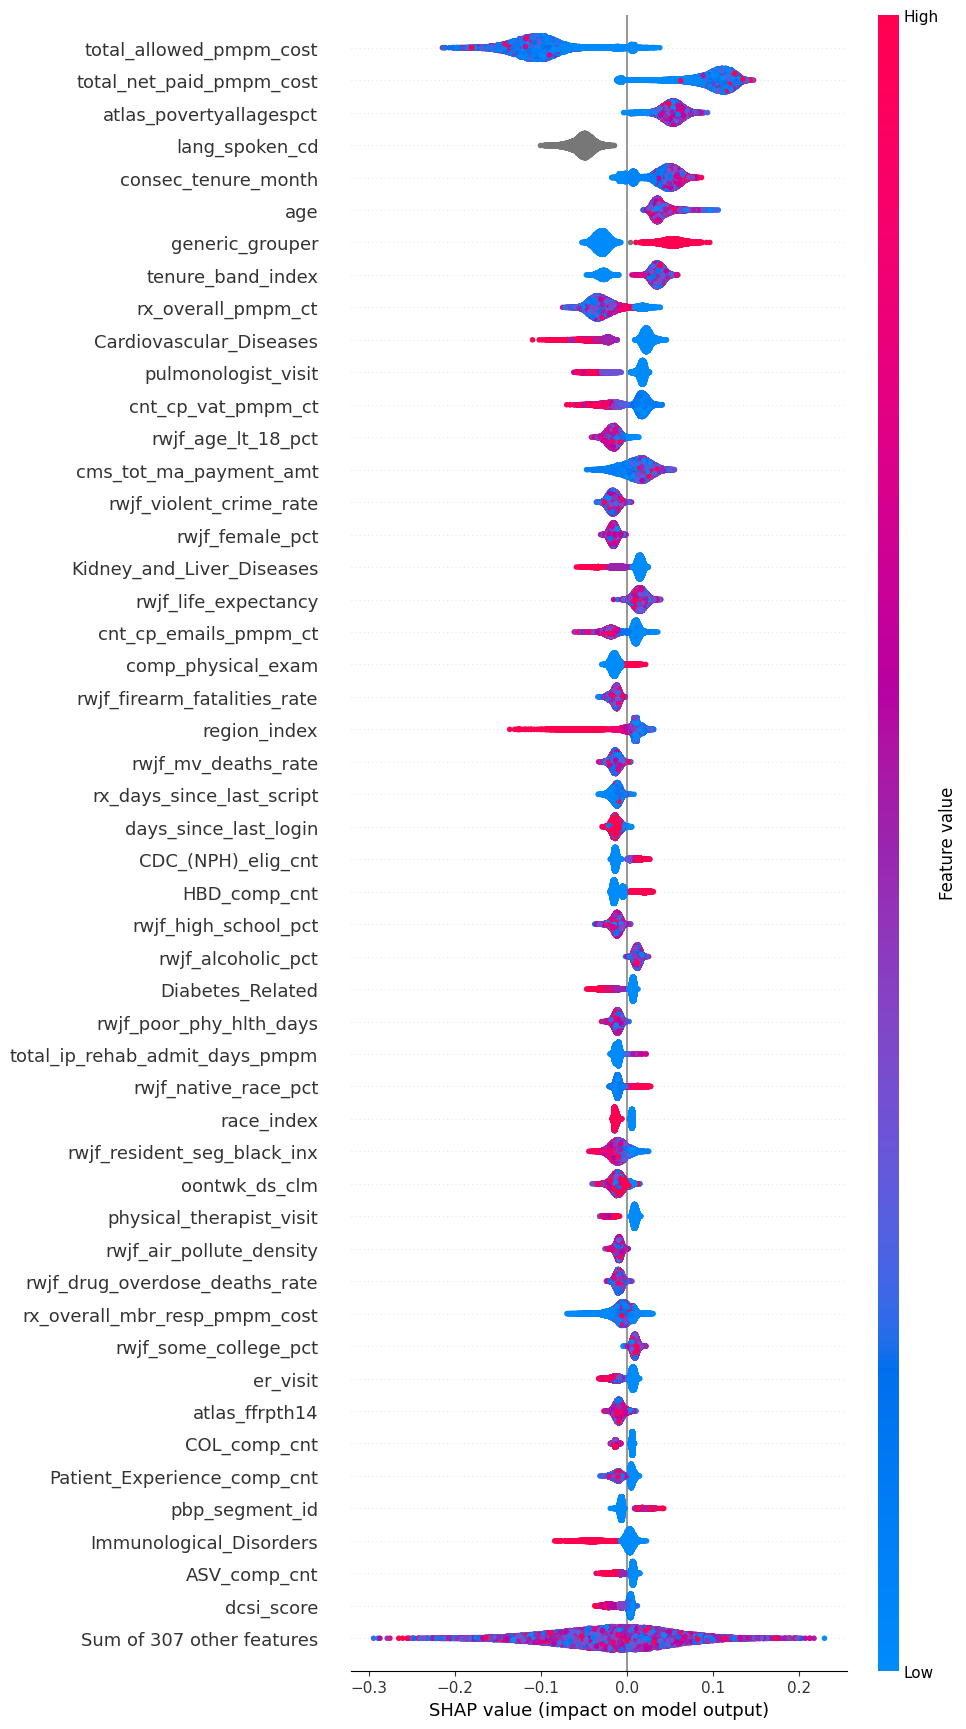

In [40]:
shap.plots.beeswarm(shap_values_adult,max_display=50)

In [ ]:
explain_df_TP=explain_df[(explain_df['predicted']==1)& (explain_df['preventive_visit_gap_ind']==1)][['id']+feature_cols]

In [ ]:
explainer_tp=TreeExplainer(single_model,explain_df,model_output='probability')
shap_values_tp = explainer_tp(explain_df_TP.sample(frac=0.15))

In [ ]:
shap.plots.beeswarm(shap_values_tp)

In [122]:
feat_imp=pd.DataFrame({'columns':feature_cols,'value':single_model.feature_importances_})

In [123]:
feat_imp_short=feat_imp.loc[feat_imp['value']>0].sort_values(by='value', ascending=False)

In [124]:
feat_imp_short.head(25)

,columns,value
250,preventative_visit,0.048227
112,riskarr_downside,0.045131
234,veteran_ind,0.038164
95,total_net_paid_pmpm_cost,0.033977
231,generic_grouper,0.025592
232,unattributed_provider,0.023215
115,riskarr_global,0.018965
262,obgyn_visit,0.017901
228,disabled_ind,0.016179
287,COL_comp_cnt,0.014865
